<a href="https://colab.research.google.com/github/Sinamhd9/Safe-driver-prediction/blob/main/safe_driver_prediction_a_comprehensive_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Safe driver prediction: A comprehensive data analysis, visualization, and modeling


# Problem Description

Before doing any data science project, it is important to ask ourselves what is the problem we are going to solve? Can we predict if someone is going to file an insurance claim next year? It seems this problem has too much randomness in its nature and it will be hard to predict the future based on the past data. This is why the best score of the leaderboard is not far better than a random guess. However, we cannot ignore the predictive power of some features. 

Porto Seguro, is one of Brazil’s largest auto and homeowner insurance companies. The problem we are going to tackle is to train a model that can predict the probability that a driver will initiate an auto insurance claim in the next year. An accurate model  will allow the company to further tailor their prices and gain more profit and it can be benefical for safe drivers as well.

In this project, I will use Lightgbm boosting algorithm which is a gradient boosting framework that uses tree based learning algorithms. As we will see later, this algorithm is really light!
<a href="https://lightgbm.readthedocs.io/en/latest/"> [1]</a>:

# Explanatory Data Analysis (EDA)


First, we are going to see the train and test data size and some of their examples. 

<a id="21"></a>

## Train and test data

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

df_train = pd.read_csv('../input/porto-seguro-safe-driver-prediction/train.csv')
df_test = pd.read_csv('../input/porto-seguro-safe-driver-prediction/test.csv')
print('train data size', df_train.shape)
print('test data size', df_test.shape)
display(df_train.head())
display(df_test.head())

train data size (595212, 59)
test data size (892816, 58)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


We can see that the training data size is $595212\times 59$ and test data size is $892816\times58$. It means our testing data size is bigger. As we can see from the above tables, we have 59 columns in training and 58 in test, where the difference is the target variable. The feature names are encoded so we cannot know what they mean, however, we know the features that belong to similar groupings are tagged (e.g., ind, reg, car, calc). Also, we know that cat shows categorical variable and bin means binary. The target values are binary labels which 1 means that claim was filed.  

<a id="22"></a>

## Target labels

Here is a visualization of the target labels. We can see that the labels are binary which means whether someone claimed (1) or not (0). The interesting point is that the target variables are not distributed equally, i.e., the dataset is not balanced. 

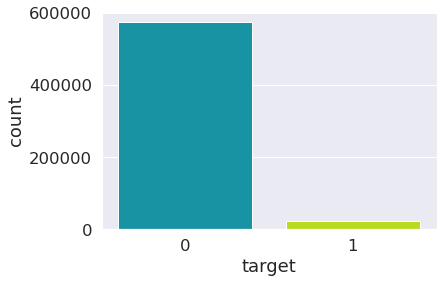

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
sns.set_palette("Paired")
sns.set(font_scale=1.5)
plt.figure()
sns.countplot(df_train['target'],palette='nipy_spectral')
plt.show()

<a id="23"></a>

## Missing values

Nan values = 0


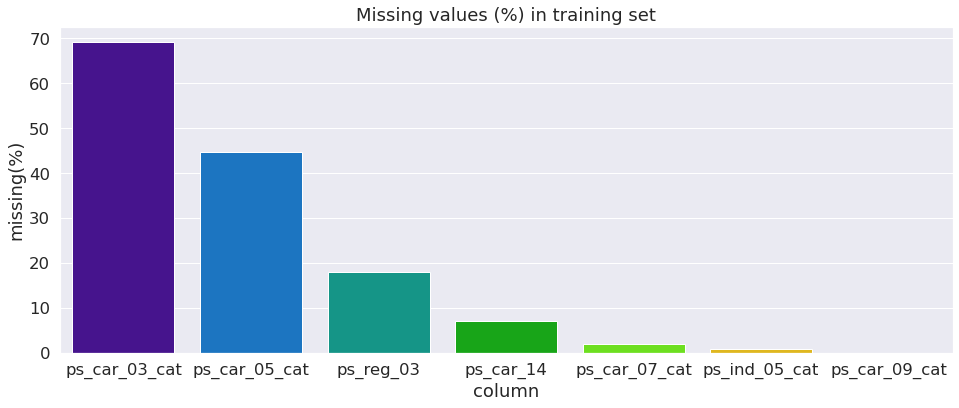

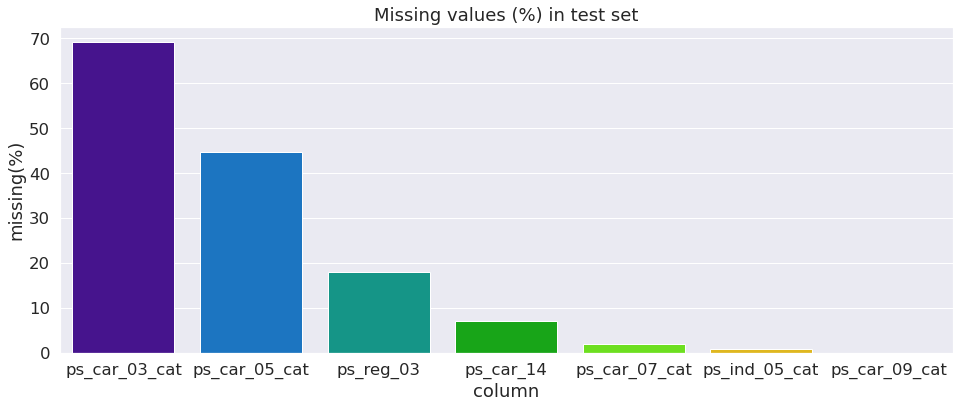

In [ ]:

print('Nan values =', df_train.isnull().sum().sum())
df_missing_train = pd.DataFrame({'column':df_train.columns, 'missing(%)':((df_train==-1).sum()/df_train.shape[0])*100})
df_missing_test = pd.DataFrame({'column':df_test.columns, 'missing(%)':((df_test==-1).sum()/df_test.shape[0])*100})

df_missing_train_nl = df_missing_train.nlargest(7, 'missing(%)')
df_missing_test_nl = df_missing_test.nlargest(7, 'missing(%)')
sns.set_palette(sns.color_palette('nipy_spectral'))
plt.figure(figsize=(16,6))
sns.barplot(data= df_missing_train_nl, x='column', y='missing(%)',palette='nipy_spectral')
plt.title('Missing values (%) in training set')
plt.show()
plt.figure(figsize=(16,6))
sns.barplot(data= df_missing_test_nl, x='column', y='missing(%)',palette='nipy_spectral')
plt.title('Missing values (%) in test set')
plt.show()

We can see that although there is 0 Nan values in the dataset, there are alot of -1 values which are our missing values. Some of the features have many missing values. For example, 69% of ps_car_03_cat features are missing. Please note that the numbers are in percentage. Also, we can see that we have the same amount of missing values in both training and test set with the same distribution. To better see the frequency of missing values, we are using heatmap to visualize all the features. 

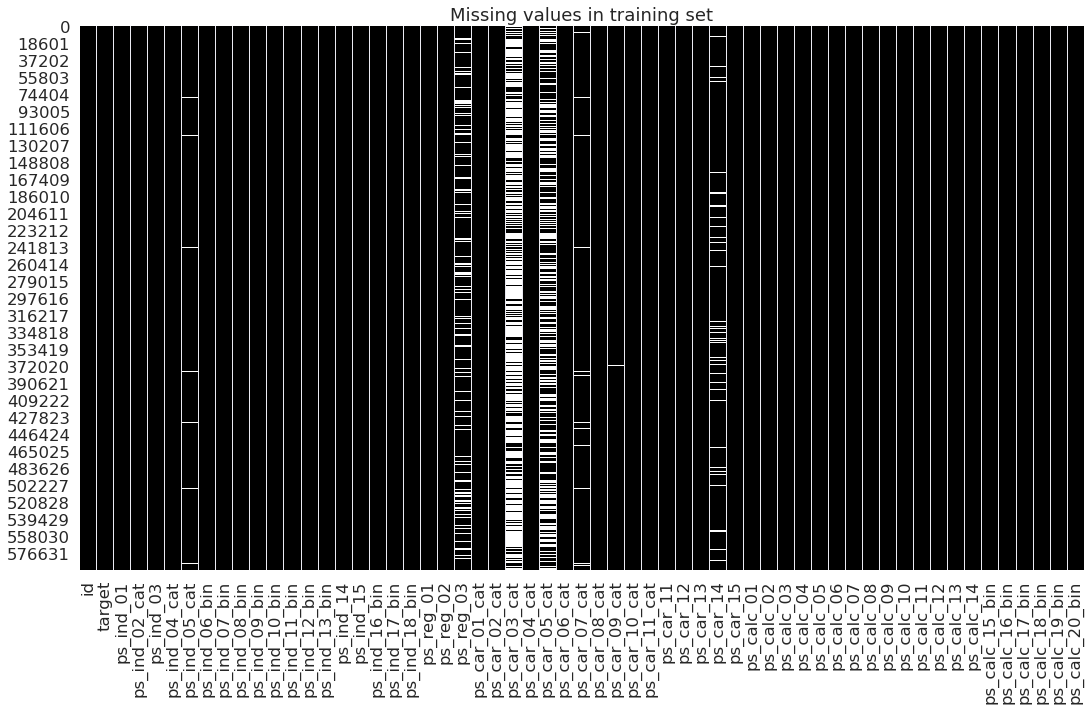

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df_train==-1, cmap='gray', cbar=False)
plt.title('Missing values in training set')
plt.show()

We can see that 'ps_car_03_cat' and 'ps_car_05_cat' have many missing values (69% and 45% respectively). For now, we are going to keep all the features.

<a id="24"></a>

## Exploring features 

We will first devide the features into different types of categorical, binary, ordinal and continous numerical and then visualize all of them. We will see different patterns which are not really meaningful because we do not know the real names of the labels. We will get back to the EDA part after training machine learning, to see if we can understand differnt patterns. 

<a id="241"></a>

### Categorical features

Here are categorical and binary features. The following figures shows the frequency of each label in categorical and binary features.

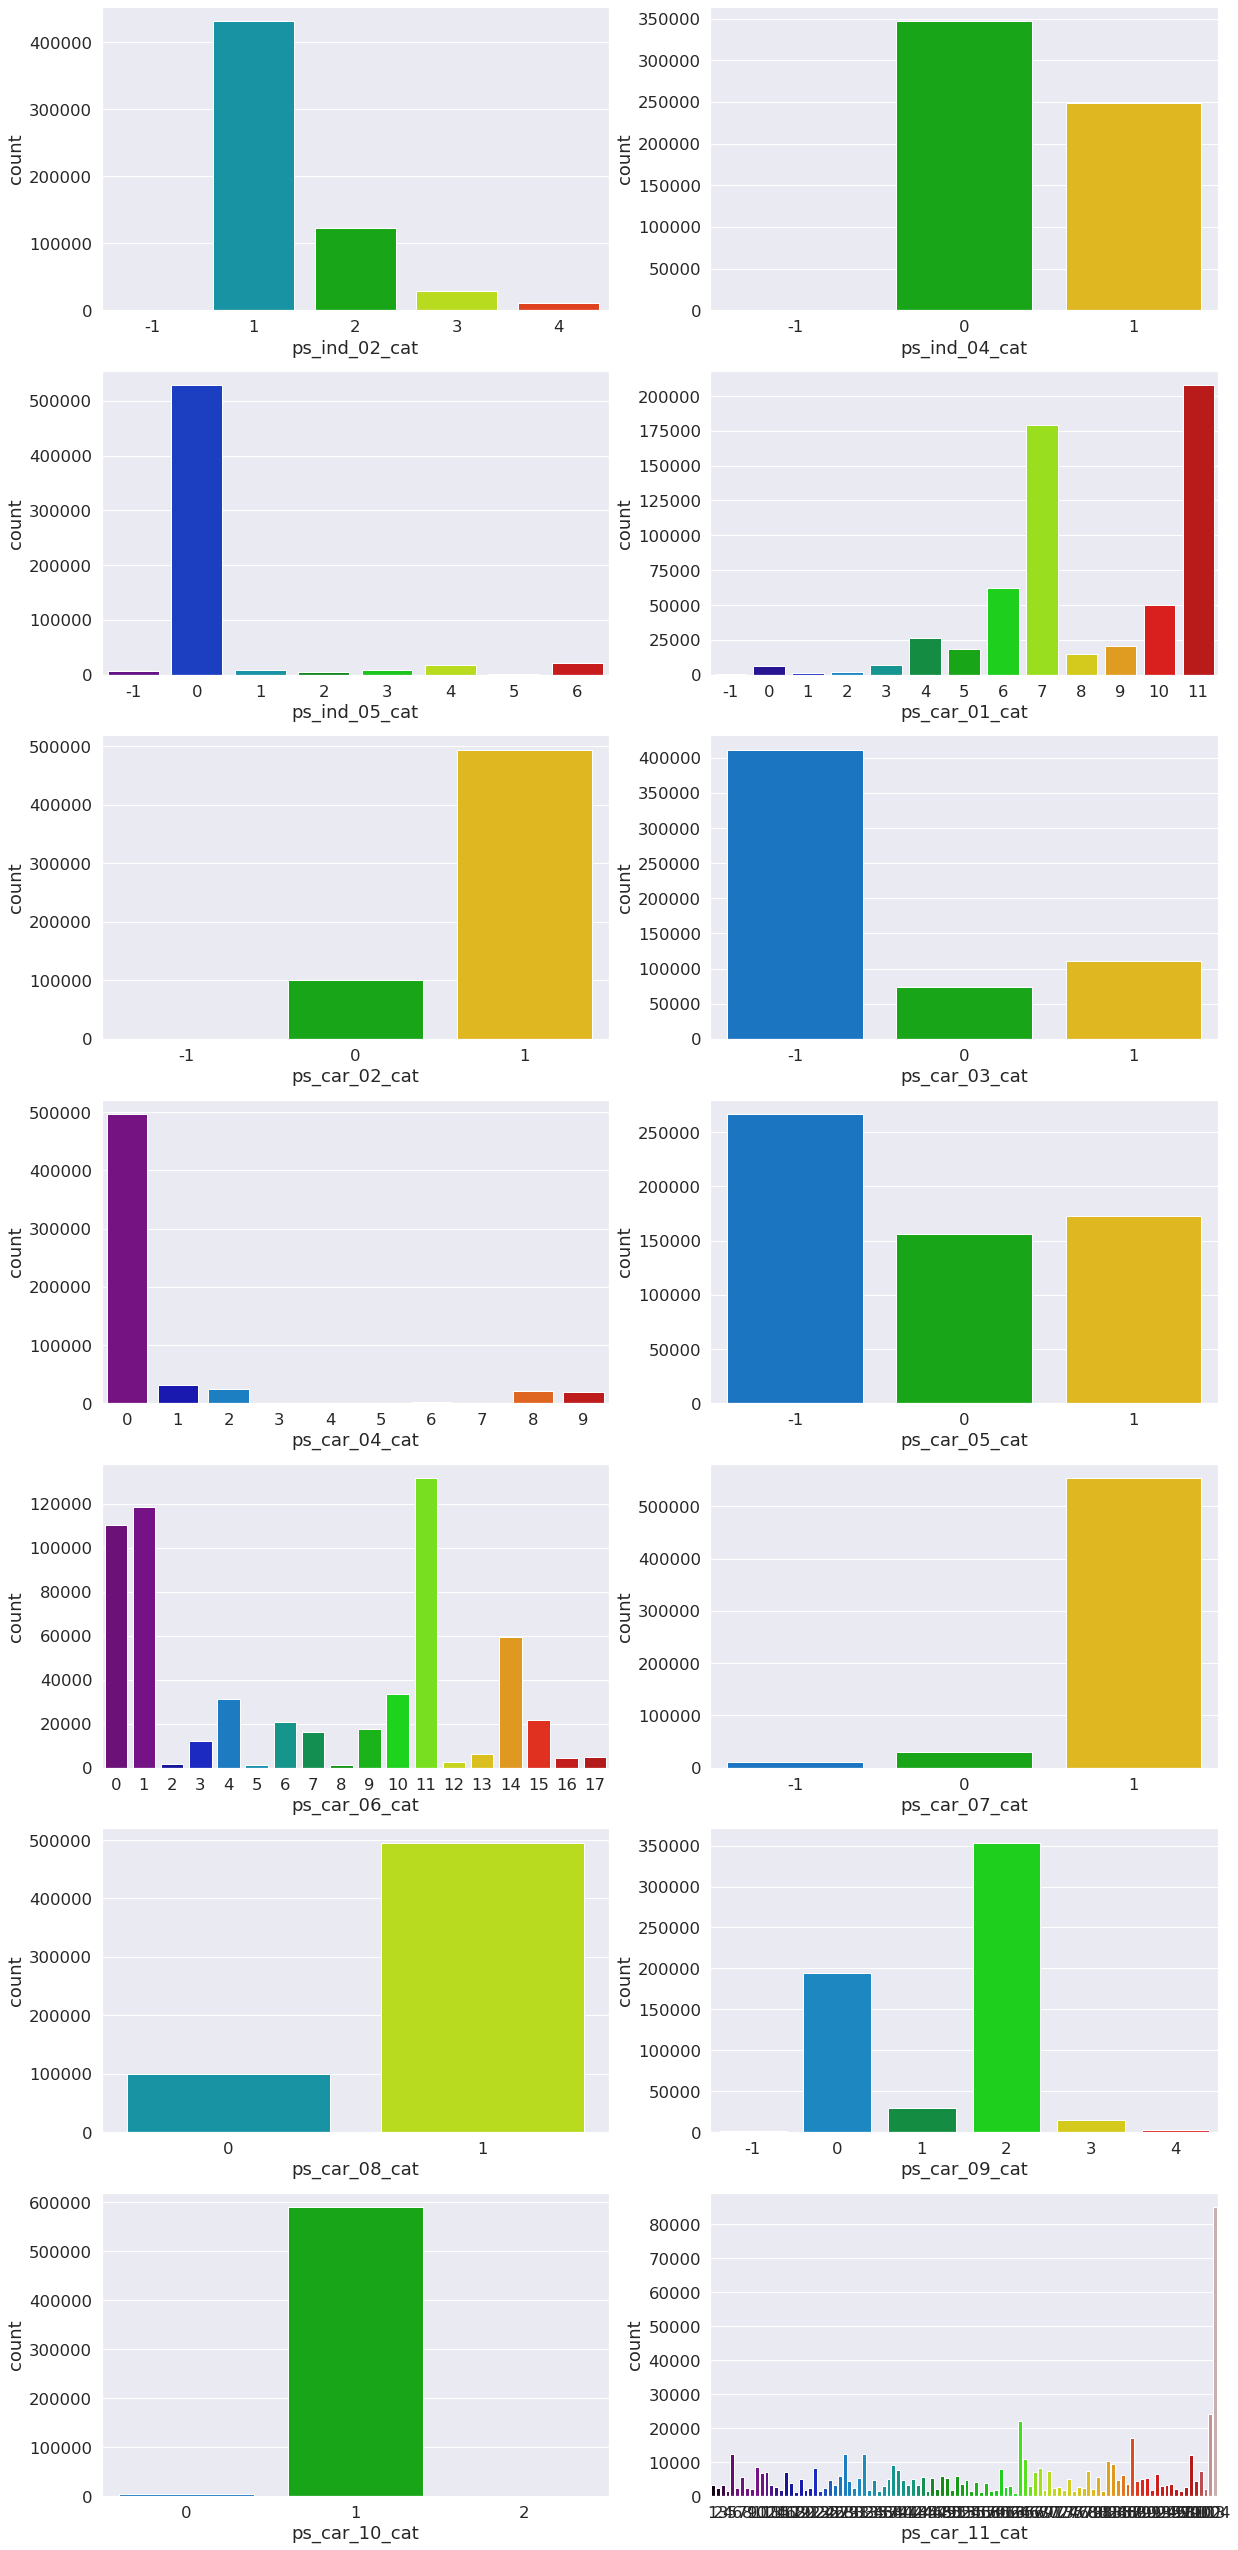

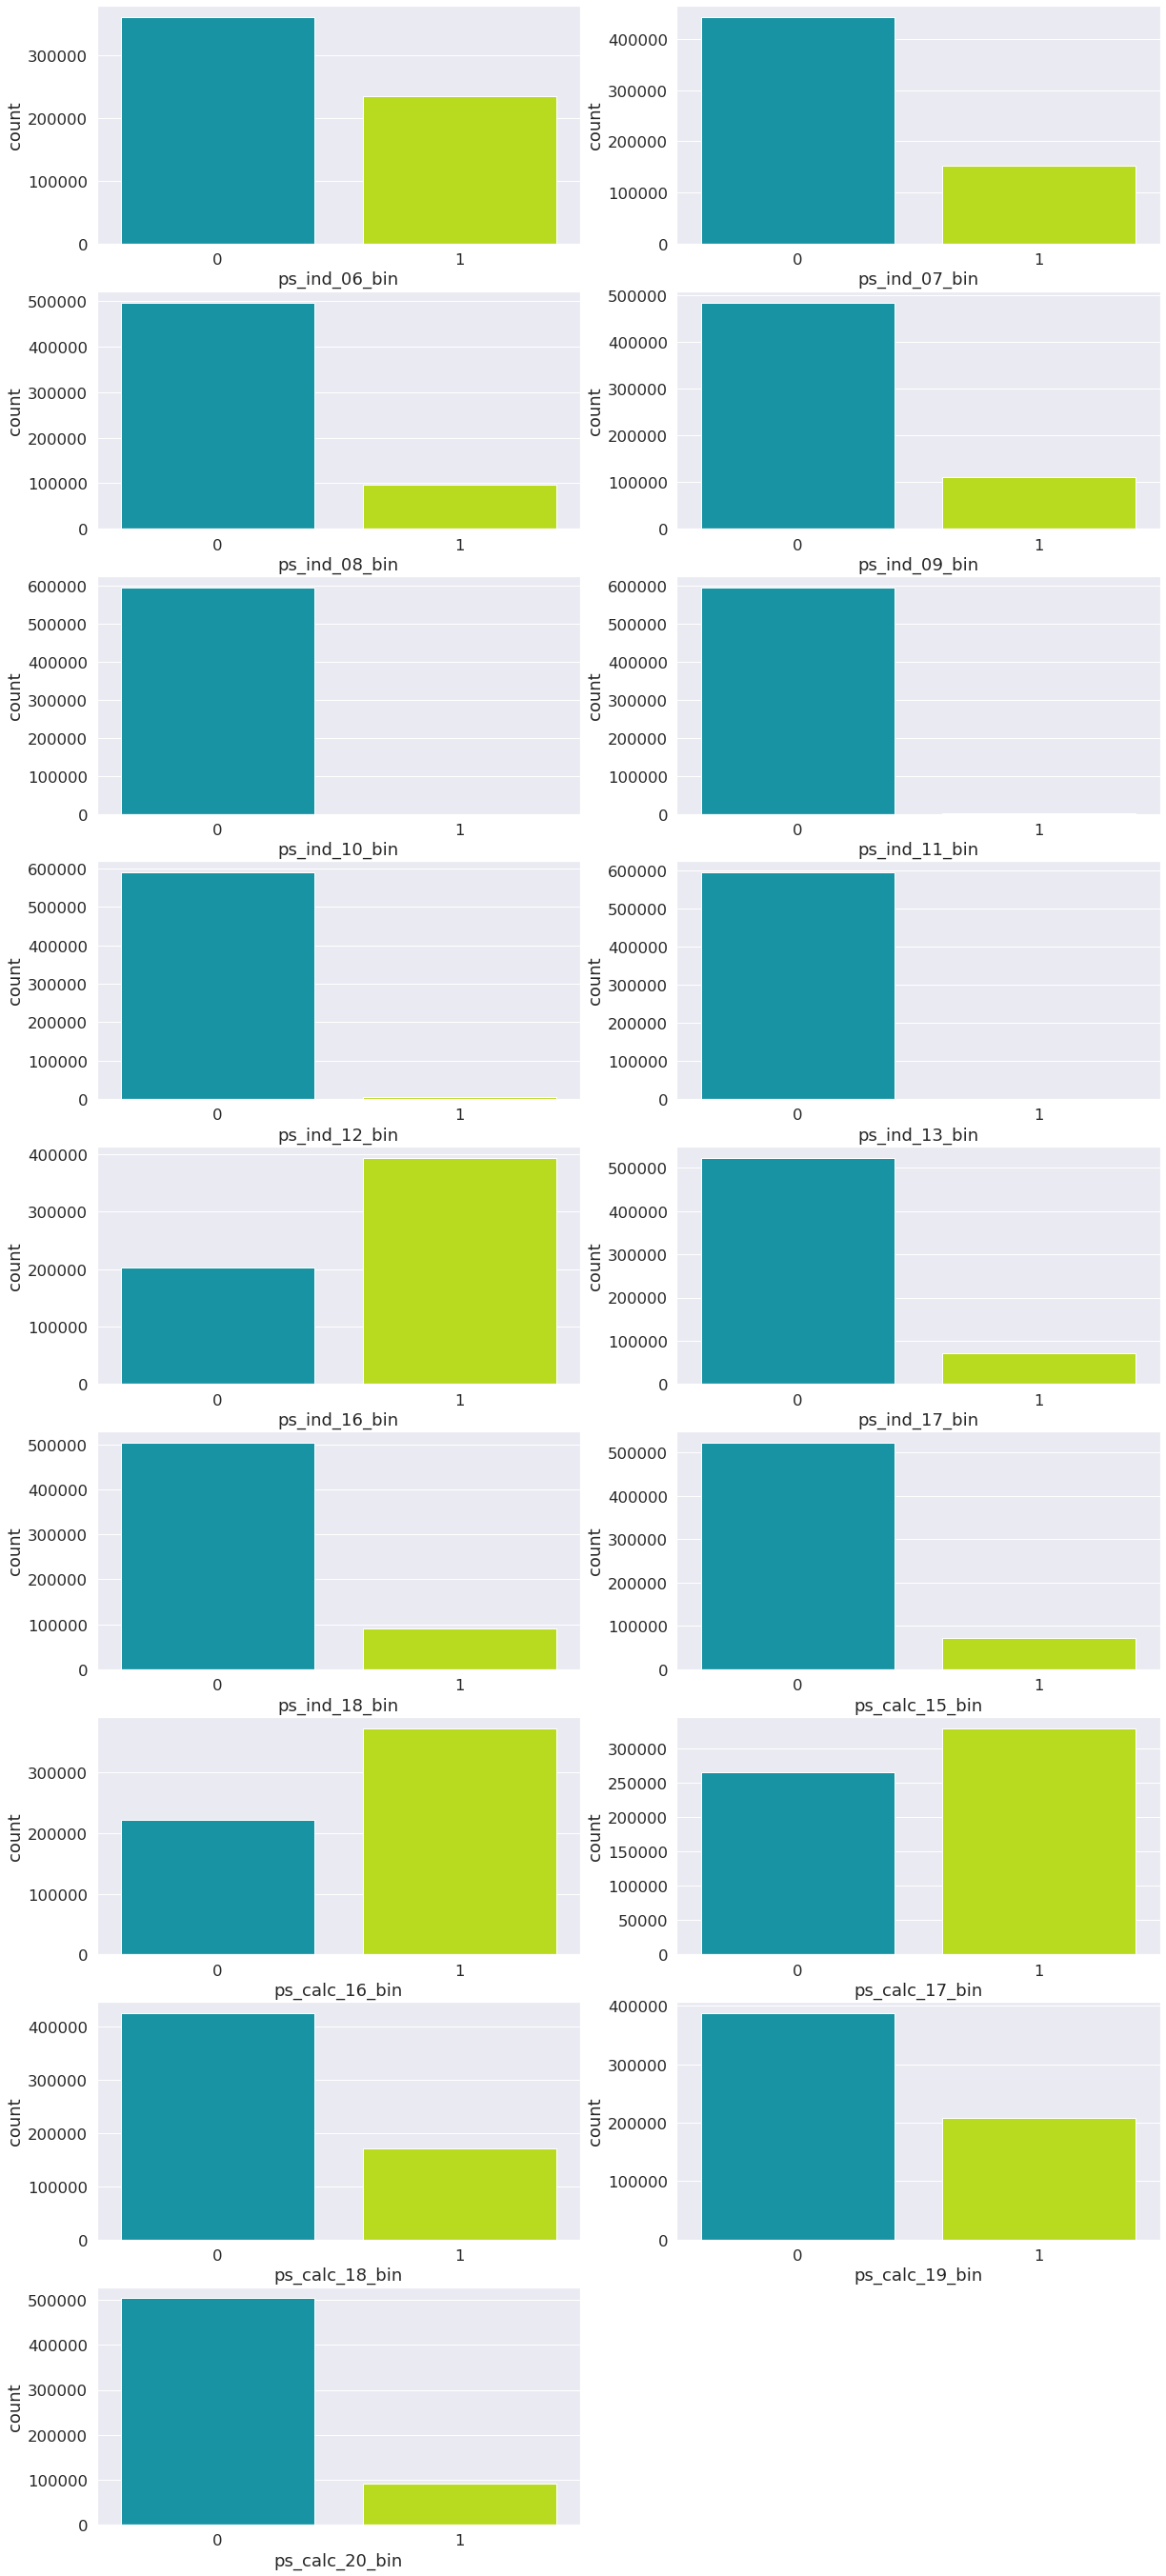

In [ ]:

features = df_train.columns.tolist()
cat_features = [c for c in features if 'cat' in c]
bin_features = [b for b in features if 'bin' in b]
cat_features_df = pd.DataFrame({'Categorical features': cat_features})
bin_features_df = pd.DataFrame({'Binary features': bin_features})

n_row = len(cat_features)
n_col = 2   
n_sub = 1   
fig = plt.figure(figsize=(20,50))
plt.subplots_adjust(bottom=-0.2,top=1.2)
for i in range(len(cat_features)):
    plt.subplot(n_row, n_col, n_sub)
    sns.countplot(x= df_train[cat_features[i]],palette='nipy_spectral')
    n_sub+=1
plt.show()

n_row = len(bin_features)
n_col = 2   
n_sub = 1      
fig = plt.figure(figsize=(20,50))
plt.subplots_adjust(bottom=-0.2,top=1.2)
for i in range(len(bin_features)):
    plt.subplot(n_row, n_col, n_sub)
    sns.countplot(x= df_train[bin_features[i]],palette='nipy_spectral')
    n_sub+=1   
plt.show()

From the above figures we can see the following:

1) 'ps_car_11' has too many categories (104).<br>

2) 'ps_ind_04_cat', 'ps_car_02_cat, 'ps_car_03_cat','ps_car_05_cat', and 'ps_car_07_cat', are binary, but with missing values of -1, they turned into three categories.<br>

3) 'ps_ind_05_cat and 'ps_car_04_cat' have the most frequnency in their 0 category. <br>

4) 'ps_car_08_cat has exactly two categories, but it is not named binary. The reason can be that this variable can take more than two categories but there are no examples in this dataset. <br>

5) 'ps_car_10_cat' is almost always 1. <br>

6) 'ps_ind_10_bin' and 'ps_ind_11_bin', 'ps_ind_12_bin'  and 'ps_ind_13_bin' are almost always 0. <br>

<a id="242"></a>

### Ordinal features 
Features which are not categorical or binary are either numerical or ordinal. Ordinal feature can be something like the model year of the car. For example, when comparing 2011 and 2016 models of the same make, the order matters. 

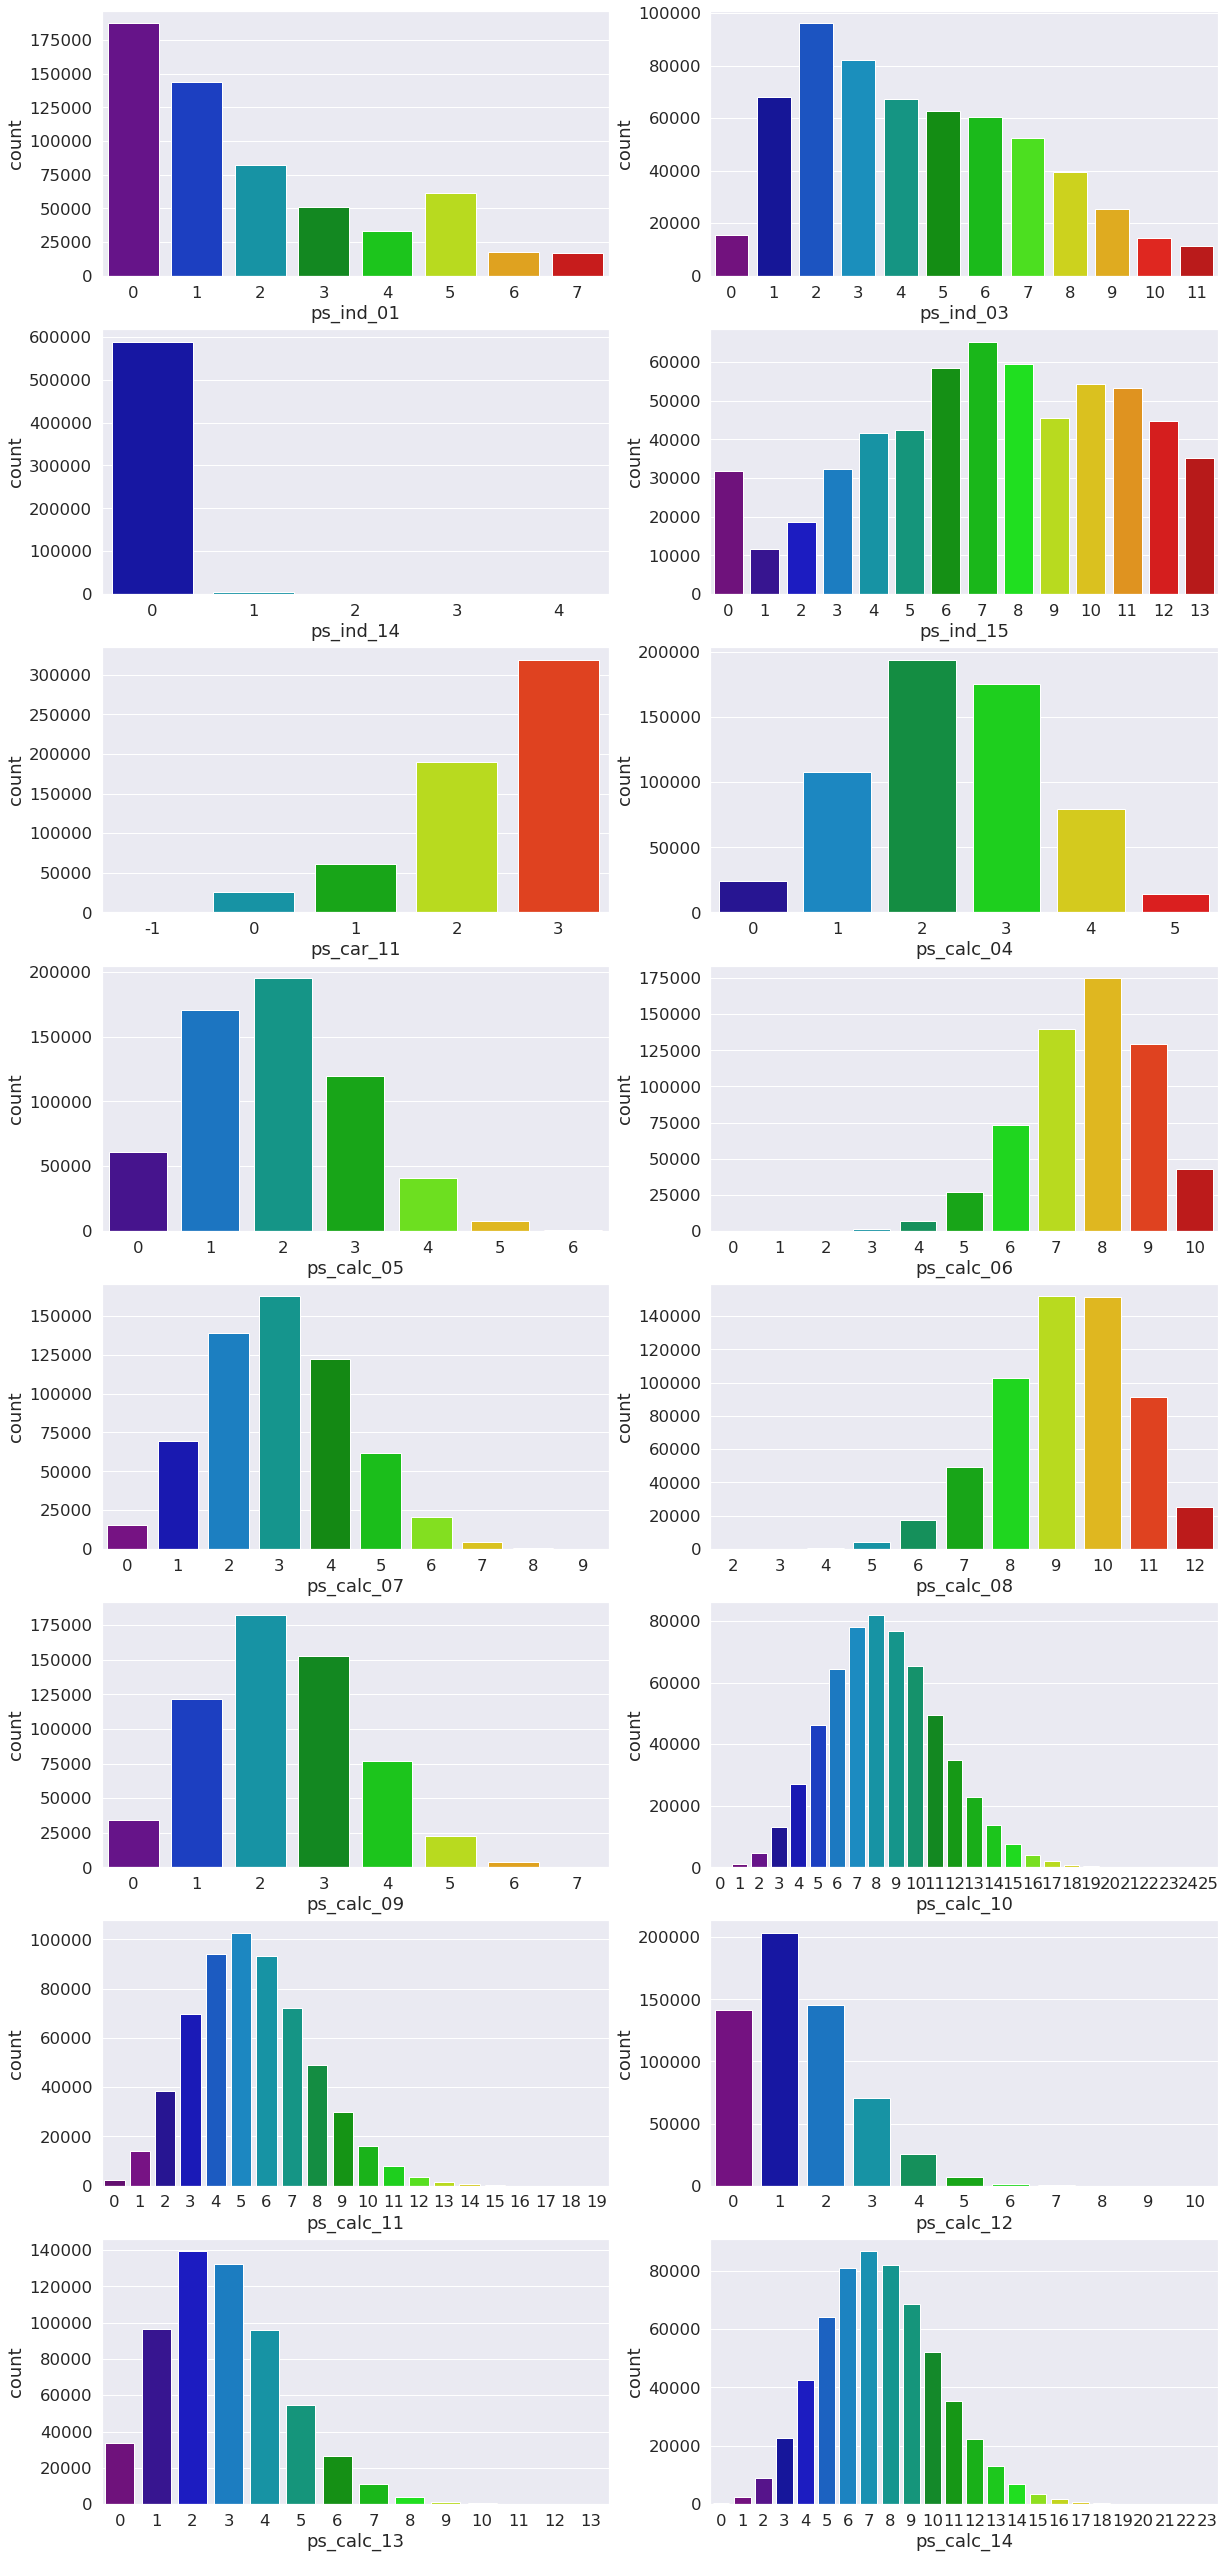

In [ ]:
int_features = df_train.select_dtypes(include=['int64']).columns.tolist()

ordinal_features = [o for o in int_features if ('cat' not in o and 'bin' not in o and 'id' not in o and 'target' not in o )]
ord_features_df = pd.DataFrame({'Ordinal features': ordinal_features})

n_row = len(ordinal_features)
n_col = 2   
n_sub = 1      
fig = plt.figure(figsize=(20,50))
plt.subplots_adjust(bottom=-0.2,top=1.2)
for i in range(len(ordinal_features)):
    plt.subplot(n_row, n_col, n_sub)
    sns.countplot(x= df_train[ordinal_features[i]],palette='nipy_spectral')
    n_sub+=1   
plt.show()

From the above figures we can see:<br>

1) 'ps_ind_14' has almost only 0s.<br>

2) Many of the ordinal features have more than 7 categories with some over 25. We have know idea what they really are.

<a id="243"></a>

### Numerical continuous features
We will visualize the continous features with distplots:

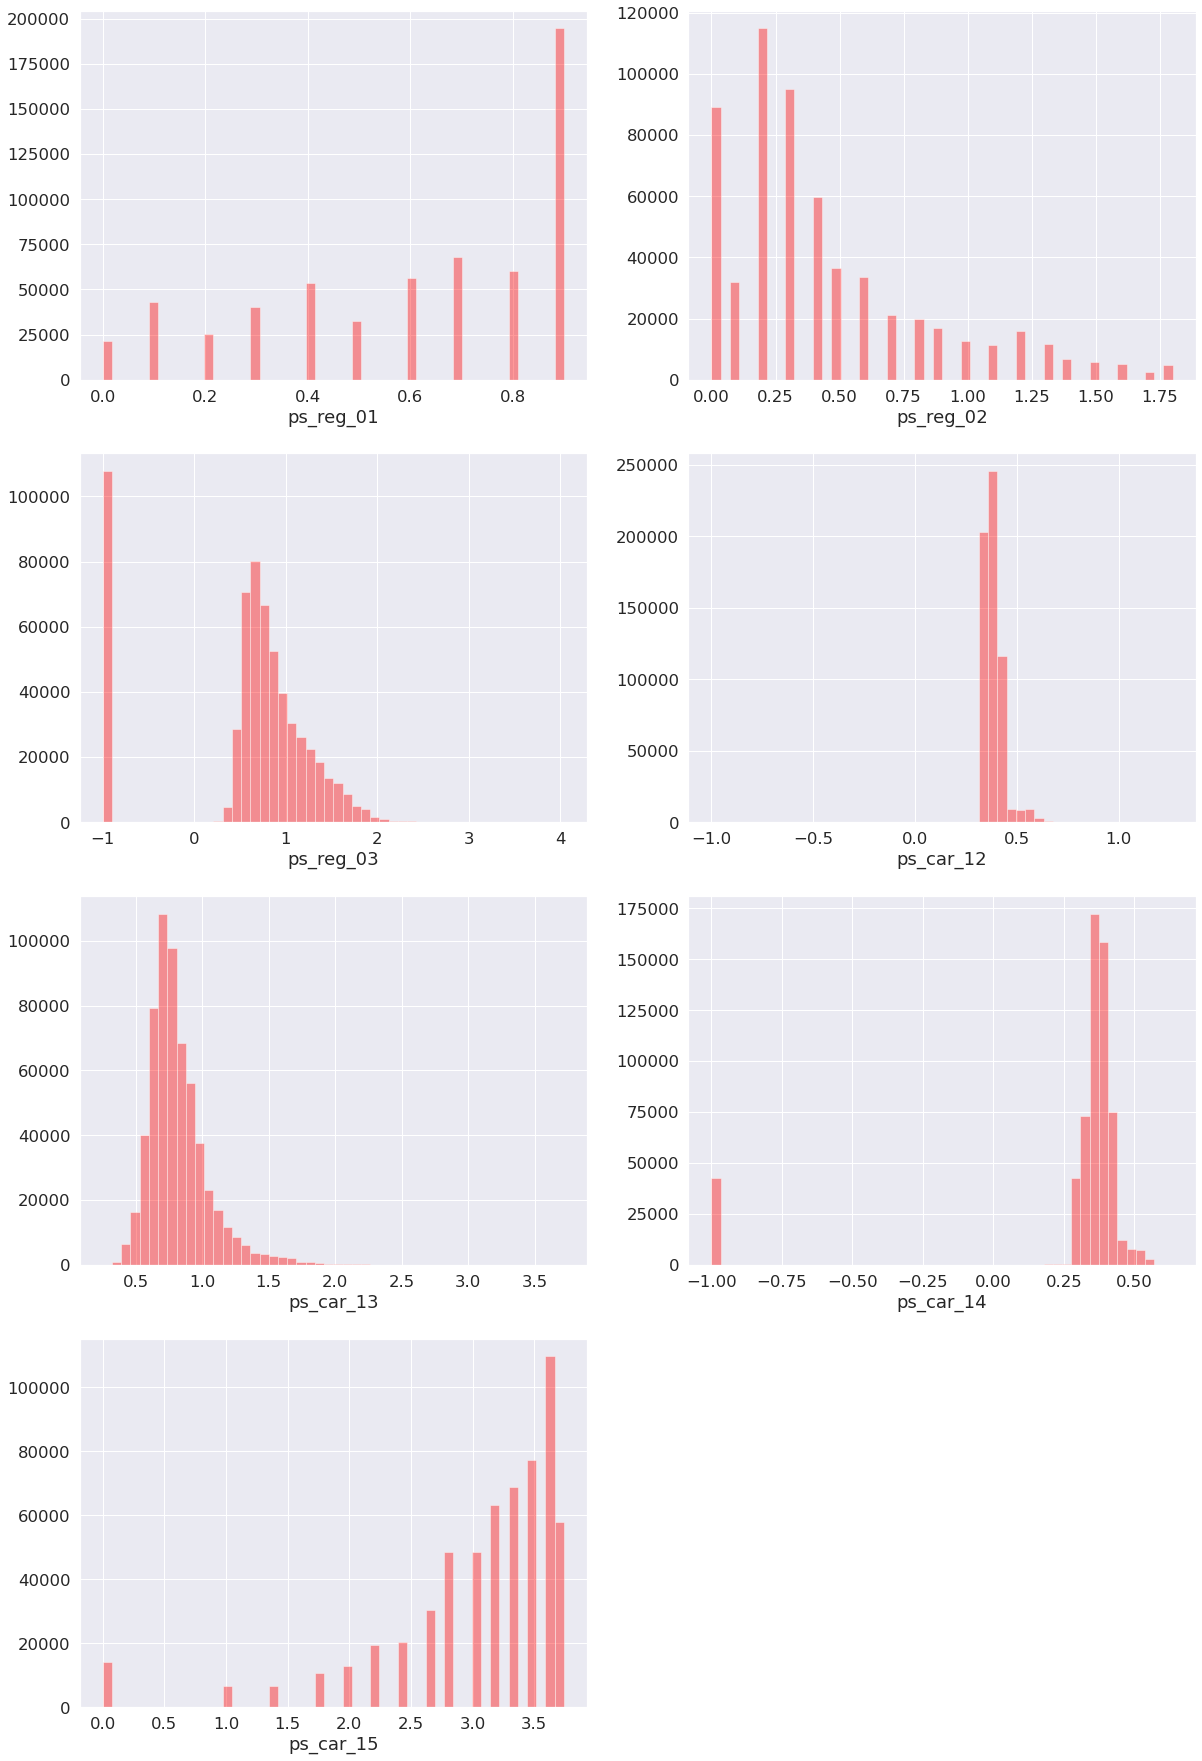

In [ ]:
cont_features = df_train.select_dtypes(include=['float64']).columns.tolist()
cont_features_df = pd.DataFrame({'Numerical Continuous features': cont_features})
cont_features.remove('ps_calc_01')
cont_features.remove('ps_calc_02')
cont_features.remove('ps_calc_03')

n_row = len(cont_features)
n_col = 2   
n_sub = 1      
fig = plt.figure(figsize=(20,30))
plt.subplots_adjust(bottom=-0.2,top=1.2)
for i in range(len(cont_features)):
    plt.subplot(n_row, n_col, n_sub)
    sns.distplot(df_train[cont_features[i]], kde=False,color='Red')
    n_sub+=1   
plt.show()

'ps_reg_3' seems to be right skewed. We can see many -1 values in this feature which we will replace later.<br>
Next figure is a pearson correlation plot which is a measure of linear correlation between two variables. 

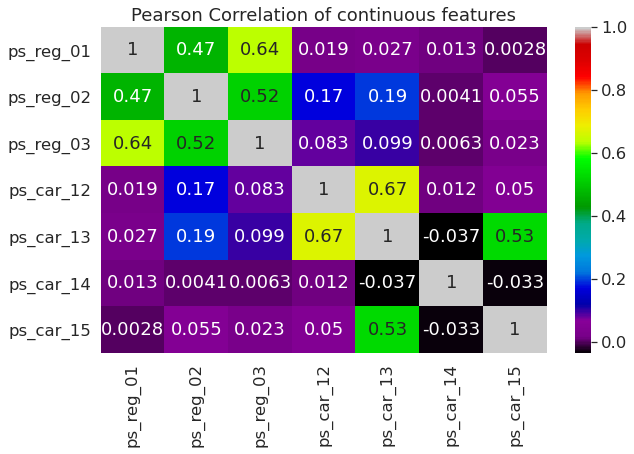

In [ ]:
a = df_train[cont_features]
plt.figure(figsize=(10,6))
sns.heatmap(a.corr(), annot=True,cmap='nipy_spectral')
plt.title('Pearson Correlation of continuous features')
plt.show()

From the above figure we can see: <br>

'ps_car_1' and 'ps_car_2' and 'ps_car_3' have high linear correlation with eachother.<br>

'ps_car_12' and 'ps_car_'13' have the highest linear correlation.<br>

'ps_car_13', and 'ps_car_15' also have high correlation.<br>

It seems that ps_calc continous features do not have any linear correlation with other continous features. 

#Training

My approach to this project is explained through different steps. As a summary, we first train three different simple models to choose the best performance in terms of gini score and speed. Then, we will see how to deal with the imbalanced dataset. Afterwards, we will go through choosing cross-validation sets, performing hyperparameter tuning, feature engineering and choosing our final model. 

<a id="31"></a>

## Training three simple models
First, we will train three models of random forest, xgboost and lightgbm to see how is their performance. 
At this point, there is no change to the features (we just simply drop id column). 


In [ ]:
X_train = df_train.drop(['id', 'target'], axis=1)
y_train = df_train['target']

In [ ]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, f1_score, roc_auc_score
from time import time

def metrics(true, preds):
    accuracy = accuracy_score(true, preds)
    recall = recall_score(true, preds)
    f1score = f1_score(true, preds)
    cf = confusion_matrix(true, preds)
    print('accuracy: {}, recall: {}, f1-score: {}'.format(accuracy, recall, f1score))
    print('Confusion matrix', cf)

def gini(true, preds):
    res = 2* roc_auc_score(true, preds) - 1
    return res

X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, random_state=42, test_size=0.2)

def test_clfs(clfs):
    for clf in clfs:
        print('------------------------------------------')
        start = time()
        clf = clf(random_state=42)
        clf.fit(X_tr, y_tr)
        y1_pred = clf.predict(X_te)
        y1_pred_prob = clf.predict_proba(X_te)
        print(str(clf), '\nresults:')
        metrics(y_te, y1_pred)
        print('gini score', gini(y_te, y1_pred_prob[:, 1]))
        end = time()
        print('Processing time', end-start,'s')

classifiers = [LGBMClassifier, XGBClassifier, RandomForestClassifier]
test_clfs(classifiers)

------------------------------------------
LGBMClassifier(random_state=42) 
results:
accuracy: 0.9631645707853465, recall: 0.00022805017103762827, f1-score: 0.0004558924093913836
Confusion matrix [[114657      1]
 [  4384      1]]
gini score 0.2792239786307733
Processing time 8.90762209892273 s
------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 
results:
accuracy: 0.9631729711112791, recall: 0.0009122006841505131, f1-scor

Without parameter search, We can see that LGBMClassifier and XGBoost have better gini scores than randomforest. However, Lightgbm is mush faster and thus it can be helpful in extensive hyperparameter searching. Therefore, we will continue with parameter tuning only for Lightgbm.

It should be also noted that, as we can see from the confusion matrix, all the positive cases (1s) are missclassified, however we still have a very good gini score while recall is 0. The reason is for hard-classification the probability threshold of the classifier is 0.5. However, in this competition, we do not care about the hard predicted labels, and the only thing matters is the relative probability of the points in comparsion with each other. For example, we expect a higher probability for someone who is going to claim than someone who is not. Therefore, gini score is used in this competition and we will fine tune our parameters to maximize this score. 

<a id="32"></a>

## Dealing with imbalance dataset
We will train our model with the transformed data. The transformations are random undersampling, random oversampling and SMOTE over sampling $\href{https://imbalanced-learn.readthedocs.io/en/stable/api.html}{[2]}$.

<a id="321"></a>

### Undersampling and Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

sm_methods = [SMOTE,RandomUnderSampler,RandomOverSampler]
clf = LGBMClassifier(random_state=42)
for sm in sm_methods:
    print('------------------------------------------')
    sm = sm(random_state=42)
    start = time()
    X_train_resampled, y_train_resampled = sm.fit_sample(X_tr, y_tr)
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_te)
    y_pred_prob = clf.predict_proba(X_te)
    print(str(sm), 'results:')
    print('training resampled shape', X_train_resampled.shape)
    print('value counts in each class', y_train_resampled.value_counts())
    metrics(y_te, y_pred)
    gini_score = gini(y_te, y_pred_prob[:, 1])
    print('Normalized gini score', gini_score)
    end = time()
    print('Processing time', end-start,'s')

------------------------------------------
SMOTE(random_state=42) results:
training resampled shape (917720, 57)
value counts in each class 1    458860
0    458860
Name: target, dtype: int64
accuracy: 0.9631309694816159, recall: 0.0, f1-score: 0.0
Confusion matrix [[114654      4]
 [  4385      0]]
Normalized gini score 0.19663590096992234
Processing time 32.934096336364746 s
------------------------------------------
RandomUnderSampler(random_state=42) results:
training resampled shape (34618, 57)
value counts in each class 1    17309
0    17309
Name: target, dtype: int64
accuracy: 0.6133917996018245, recall: 0.5746864310148233, f1-score: 0.09870160390106338
Confusion matrix [[70500 44158]
 [ 1865  2520]]
Normalized gini score 0.26646332070429946
Processing time 2.065469741821289 s
------------------------------------------
RandomOverSampler(random_state=42) results:
training resampled shape (917720, 57)
value counts in each class 1    458860
0    458860
Name: target, dtype: int64
acc

What happened? Well, resampling helps our classifier to improve the hard classification. As we can see, accuracy is more realistic now (as we have same number of class labels) and from confusion matrix, recall and f1 score, we can see many positive points are correctly classified. However, gini score, did not improve. The reason could be that resampling helps our algorithm to make the classifications better, however, this doesn't matter for gini score. The only thing matters is that we can predict higher probabilities for an example whose true label is 1 than 0. By resampling, we are imposing some changes to our real original distribution which can result in loss of gini score. Since gini score is the metric for this competition, we will not perform resampling on the original dataset.


<a id="33"></a>

## Train and validate (Stratified KFold)

Before hyperparameter tuning, let's train our simple model with cross-validation sets. We will use StratifiedKFold to make sure we have same ratio of classes in each cross-val set. 

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict

cv = StratifiedKFold(n_splits=5)
scores_gini = []

for train_index, validation_index in cv.split(X_train, y_train):
    train, val = X_train.iloc[train_index], X_train.iloc[validation_index]
    target_train, target_val = y_train.iloc[train_index], y_train.iloc[validation_index]
    clf = LGBMClassifier(random_state=42)
    clf.fit(train, target_train)
    y_val_pred = clf.predict(val)
    y_val_pred_prob = clf.predict_proba(val)
    gini_score = gini(target_val, y_val_pred_prob[:, 1])
    print('gini score:', gini_score)
    scores_gini.append(gini_score)
    
print('mean gini_score: {}'.format(np.mean(scores_gini)))


gini score: 0.27316138799704537
gini score: 0.27334450208158856
gini score: 0.2716322988153814
gini score: 0.27955185772451663
gini score: 0.26898272787499855
mean gini_score: 0.2733345548987061


Ok, so far, we got mean gini score of 0.273 on our cross-validation sets. Let's tune some hyper parameters of our model. 

<a id="34"></a>

## Hyperparameter tuning

We are going to search among these parameters for our lightgbm classifiers: 

subsample = [0.5, 0.7, 0.9] <br>
num_leaves = [10, 12, 15, 20, 25, 30]<br>
learning_rate = [0.1, 0.15, 0.2]<br>
n_estimators = [50, 100, 150, 200]<br>
min_child_weight = [0.01, 0.1, 1, 10, 50, 100, 150, 200]<br>
min_child_samples = [5, 10, 15, 20, 25]<br>

Before search, we encode our categorial features into one hot format. 

In [ ]:
df_train = pd.read_csv('../input/porto-seguro-safe-driver-prediction/train.csv')
X_train = df_train.drop(['id', 'target'], axis=1)
y_train = df_train['target']
features = df_train.columns.tolist()
cat_features = [c for c in features if 'cat' in c]
X_train = pd.get_dummies(X_train, columns=cat_features, prefix_sep='_', drop_first=True)


In [ ]:
# subsample = [0.5, 0.7, 0.9]
# num_leaves = [10, 12, 15, 20, 25, 30]
# learning_rate = [0.1, 0.15, 0.2]
# n_estimators = [50, 100, 150, 200]
# min_child_weight = [0.01, 0.1, 1, 10, 50, 100, 150, 200]
# min_child_samples = [5, 10, 15, 20, 25]

# params = dict(num_leaves=num_leaves, subsample=subsample, learning_rate=learning_rate,
#               n_estimators=n_estimators, min_child_samples=min_child_samples, min_child_weight=min_child_weight)
# clf = GridSearchCV(estimator=LGBMClassifier(random_state=42, n_jobs=-1), param_grid=params, scoring='roc_auc', cv=cv, n_jobs=-1,
#                    verbose=2)
# clf.fit(X_train, y_train)

# print('best params', clf.best_params_)
# print('best score', clf.best_score_)

# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"
#           % (mean, std * 2, params))
best_params = {'learning_rate': 0.1, 'min_child_samples': 5, 'min_child_weight': 100, 'n_estimators': 100, 'num_leaves': 20, 'subsample': 0.5}
print('best parameters', best_params)

best parameters {'learning_rate': 0.1, 'min_child_samples': 5, 'min_child_weight': 100, 'n_estimators': 100, 'num_leaves': 20, 'subsample': 0.5}


Now we train and test again with new features and tuned hyperparameters: 

In [ ]:
scores_gini = []
for train_index, validation_index in cv.split(X_train, y_train):
    train, val = X_train.iloc[train_index], X_train.iloc[validation_index]
    target_train, target_val = y_train.iloc[train_index], y_train.iloc[validation_index]
    clf = LGBMClassifier(random_state=42, n_jobs=-1)
    clf.set_params(**best_params)
    clf.fit(train, target_train)
    y_val_pred = clf.predict(val)
    y_val_pred_prob = clf.predict_proba(val)
    gini_score = gini(target_val, y_val_pred_prob[:, 1])
    print('gini score:', gini_score)
    scores_gini.append(gini_score)

print('mean gini_score: {}'.format(np.mean(scores_gini)))

gini score: 0.27982696892406755
gini score: 0.2770493555467606
gini score: 0.2837287456218218
gini score: 0.28941239884642345
gini score: 0.27422548718599415
mean gini_score: 0.2808485912250135


Well, we increased our mean normalized gini score on cross-validation sets to 0.281. Let's get back to our data and see how our model performed on some examples.

#Evaluation and Summary

In [ ]:
pd.set_option('display.max_columns', None)
y_preds = y_val_pred_prob[:,1]
results = pd.DataFrame({'target_true':target_val , 'target_pred': y_preds})
b = results.nlargest(10, columns='target_pred')
b2 = results.nlargest(1000, columns='target_pred')
c = results.nsmallest(1000, columns='target_pred')
c_counts_1 = (c['target_true']==1).sum()
b2_counts_1 =  (b2['target_true']==1).sum()
print('Numeber of 1s in 1000 smallest probabilities:', c_counts_1)
print('Number of 1s in 1000 largest probabilities:', b2_counts_1 )
display(b)
display(val.loc[b.index])

Numeber of 1s in 1000 smallest probabilities: 13
Number of 1s in 1000 largest probabilities: 130


,target_true,target_pred
505075,0,0.234284
532895,1,0.230533
593932,0,0.227302
504293,0,0.223891
560085,0,0.221483
572069,0,0.217205
495821,1,0.210496
532998,0,0.209317
571063,0,0.209126
541653,0,0.204807


,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,ps_ind_04_cat_0,ps_ind_04_cat_1,ps_ind_05_cat_0,ps_ind_05_cat_1,ps_ind_05_cat_2,ps_ind_05_cat_3,ps_ind_05_cat_4,ps_ind_05_cat_5,ps_ind_05_cat_6,ps_car_01_cat_0,ps_car_01_cat_1,ps_car_01_cat_2,ps_car_01_cat_3,ps_car_01_cat_4,ps_car_01_cat_5,ps_car_01_cat_6,ps_car_01_cat_7,ps_car_01_cat_8,ps_car_01_cat_9,ps_car_01_cat_10,ps_car_01_cat_11,ps_car_02_cat_0,ps_car_02_cat_1,ps_car_03_cat_0,ps_car_03_cat_1,ps_car_04_cat_1,ps_car_04_cat_2,ps_car_04_cat_3,ps_car_04_cat_4,ps_car_04_cat_5,ps_car_04_cat_6,ps_car_04_cat_7,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_05_cat_0,ps_car_05_cat_1,ps_car_06_cat_1,ps_car_06_cat_2,ps_car_06_cat_3,ps_car_06_cat_4,ps_car_06_cat_5,ps_car_06_cat_6,ps_car_06_cat_7,ps_car_06_cat_8,ps_car_06_cat_9,ps_car_06_cat_10,ps_car_06_cat_11,ps_car_06_cat_12,ps_car_06_cat_13,ps_car_06_cat_14,ps_car_06_cat_15,ps_car_06_cat_16,ps_car_06_cat_17,ps_car_07_cat_0,ps_car_07_cat_1,ps_car_08_cat_1,ps_car_09_cat_0,ps_car_09_cat_1,ps_car_09_cat_2,ps_car_09_cat_3,ps_car_09_cat_4,ps_car_10_cat_1,ps_car_10_cat_2,ps_car_11_cat_2,ps_car_11_cat_3,ps_car_11_cat_4,ps_car_11_cat_5,ps_car_11_cat_6,ps_car_11_cat_7,ps_car_11_cat_8,ps_car_11_cat_9,ps_car_11_cat_10,ps_car_11_cat_11,ps_car_11_cat_12,ps_car_11_cat_13,ps_car_11_cat_14,ps_car_11_cat_15,ps_car_11_cat_16,ps_car_11_cat_17,ps_car_11_cat_18,ps_car_11_cat_19,ps_car_11_cat_20,ps_car_11_cat_21,ps_car_11_cat_22,ps_car_11_cat_23,ps_car_11_cat_24,ps_car_11_cat_25,ps_car_11_cat_26,ps_car_11_cat_27,ps_car_11_cat_28,ps_car_11_cat_29,ps_car_11_cat_30,ps_car_11_cat_31,ps_car_11_cat_32,ps_car_11_cat_33,ps_car_11_cat_34,ps_car_11_cat_35,ps_car_11_cat_36,ps_car_11_cat_37,ps_car_11_cat_38,ps_car_11_cat_39,ps_car_11_cat_40,ps_car_11_cat_41,ps_car_11_cat_42,ps_car_11_cat_43,ps_car_11_cat_44,ps_car_11_cat_45,ps_car_11_cat_46,ps_car_11_cat_47,ps_car_11_cat_48,ps_car_11_cat_49,ps_car_11_cat_50,ps_car_11_cat_51,ps_car_11_cat_52,ps_car_11_cat_53,ps_car_11_cat_54,ps_car_11_cat_55,ps_car_11_cat_56,ps_car_11_cat_57,ps_car_11_cat_58,ps_car_11_cat_59,ps_car_11_cat_60,ps_car_11_cat_61,ps_car_11_cat_62,ps_car_11_cat_63,ps_car_11_cat_64,ps_car_11_cat_65,ps_car_11_cat_66,ps_car_11_cat_67,ps_car_11_cat_68,ps_car_11_cat_69,ps_car_11_cat_70,ps_car_11_cat_71,ps_car_11_cat_72,ps_car_11_cat_73,ps_car_11_cat_74,ps_car_11_cat_75,ps_car_11_cat_76,ps_car_11_cat_77,ps_car_11_cat_78,ps_car_11_cat_79,ps_car_11_cat_80,ps_car_11_cat_81,ps_car_11_cat_82,ps_car_11_cat_83,ps_car_11_cat_84,ps_car_11_cat_85,ps_car_11_cat_86,ps_car_11_cat_87,ps_car_11_cat_88,ps_car_11_cat_89,ps_car_11_cat_90,ps_car_11_cat_91,ps_car_11_cat_92,ps_car_11_cat_93,ps_car_11_cat_94,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
505075,4,0,0,1,0,0,0,0,0,0,0,6,0,1,0,0.0,0.0,-1.000000,2,0.374166,0.930598,0.349285,3.605551,0.6,0.9,0.9,3,3,9,4,10,0,9,2,2,4,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
532895,7,1,0,0,1,0,0,0,0,0,0,12,0,1,0,0.9,1.7,2.036081,1,0.374166,0.953203,0.304959,3.605551,0.2,0.1,0.9,3,2,8,0,10,0,11,5,3,4,5,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,

From the first table above, we can see that only 2 out of 10 highest predicted probabilities had true labels of 1. In the perfect world, we expect to see that any true label of 1 have high probabilities. In the second table, we can see the feature values of that 10 examples. Example 2 and Example 7 had true labels of 1, but why the others got high probability, even though their true label was 0?<br> In total, we can also see that from 1000 largest and smallest probabilities, there are 130, and 13 true 1s respectively. 13 out of 1000 for low probabilities seems good, but 130 out 1000 for the largest ones, does not seem good enough. <br>
Next we are going to see the feature importances from the model's perspective.

,feature,importance
0,ps_ind_03,157
1,ps_car_13,134
2,ps_reg_03,119
3,ps_ind_15,97
4,ps_ind_01,92
...,...,...
208,ps_car_11_cat_42,0
209,ps_car_11_cat_41,0
210,ps_car_11_cat_38,0
211,ps_car_11_cat_103,0


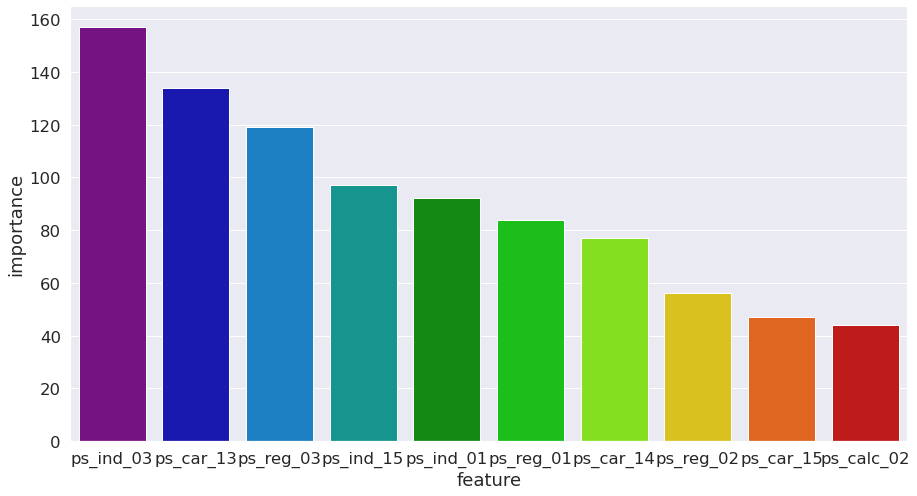

In [ ]:
from sklearn.feature_selection import SelectFromModel

features = train.columns
importances = clf.feature_importances_
indices = np.argsort(clf.feature_importances_)[::-1]
imp_features= pd.DataFrame({'feature':features[indices], 'importance':importances[indices]})
display(imp_features)
imp_features_50smallest = imp_features.nsmallest(50, 'importance')
features_to_drop = imp_features_50smallest['feature'].tolist()
imp_features_10large = imp_features.nlargest(10, 'importance')
plt.figure(figsize=(15,8))
sns.barplot(data=imp_features_10large, x='feature', y='importance',palette='nipy_spectral')
plt.show()

Now, let's see how the top 10 data differ in these features with each other.


In [ ]:
print(imp_features_10large)
display(val.loc[b.index, imp_features_10large.feature])

      feature  importance
0   ps_ind_03         157
1   ps_car_13         134
2   ps_reg_03         119
3   ps_ind_15          97
4   ps_ind_01          92
5   ps_reg_01          84
6   ps_car_14          77
7   ps_reg_02          56
8   ps_car_15          47
9  ps_calc_02          44


,ps_ind_03,ps_car_13,ps_reg_03,ps_ind_15,ps_ind_01,ps_reg_01,ps_car_14,ps_reg_02,ps_car_15,ps_calc_02
505075,0,0.930598,-1.000000,6,4,0.0,0.349285,0.0,3.605551,0.9
532895,1,0.953203,2.036081,12,7,0.9,0.304959,1.7,3.605551,0.1
593932,6,1.271199,1.890436,0,1,0.9,0.434166,1.4,3.316625,0.3
504293,0,1.261337,0.916856,12,7,0.6,0.417133,0.7,3.000000,0.3
560085,6,1.879758,1.836267,3,2,0.3,-1.000000,0.0,3.605551,0.6
572069,0,0.925992,1.218862,7,7,0.8,0.386005,1.2,3.605551,0.7
495821,6,0.973354,1.554630,2,3,0.3,0.346843,0.0,3.605551,0.3
532998,7,0.998139,1.650379,4,3,0.9,0.370675,1.5,2.645751,0.2
571063,7,1.209441,1.356927,0,1,0.3,0.358608,0.0,3.605551,0.7
541653,0,0.825860,-1.000000,2,1,0.0,0.353129,0.0,3.316625,0.6


We will replace missing values of ps_reg_03 and ps_car_14 with their median value. We also drop cat_car_05 due its many missing values. Indeed, it increases the score. 

In [ ]:
features = X_train.columns.tolist()
cat_car_05 = [c for c in features if 'car_05_cat' in c]
calc_features = [c for c in features if 'calc' in c]
X_train.drop(calc_features, axis=1, inplace=True)
X_train.drop(cat_car_05, axis=1, inplace=True)
X_train['ps_reg_03'].replace(-1, X_train['ps_reg_03'].median(), inplace=True)
X_train['ps_car_14'].replace(-1, X_train['ps_car_14'].median(), inplace=True)

scores_gini = []
for train_index, validation_index in cv.split(X_train, y_train):
    train, val = X_train.iloc[train_index], X_train.iloc[validation_index]
    target_train, target_val = y_train.iloc[train_index], y_train.iloc[validation_index]
    clf = LGBMClassifier(random_state=42, n_jobs=-1)
    clf.set_params(**best_params)
    clf.fit(train, target_train)
    y_val_pred = clf.predict(val)
    y_val_pred_prob = clf.predict_proba(val)
    gini_score = gini(target_val, y_val_pred_prob[:, 1])
    print('gini score:', gini_score)
    scores_gini.append(gini_score)
    
print('mean gini_score: {}'.format(np.mean(scores_gini)))

gini score: 0.28385071688553287
gini score: 0.2830920881888488
gini score: 0.2862896137389346
gini score: 0.29108130611302085
gini score: 0.27569829695966996
mean gini_score: 0.2840024043772014


In [ ]:
y_preds = y_val_pred_prob[:,1]
results = pd.DataFrame({'target_true':target_val , 'target_pred': y_preds})
b = results.nlargest(10, columns='target_pred')
b2 = results.nlargest(1000, columns='target_pred')
c = results.nsmallest(1000, columns='target_pred')
c_counts_1 = (c['target_true']==1).sum()
b2_counts_1 =  (b2['target_true']==1).sum()
print('Numeber of 1s in 1000 smallest probabilities:', c_counts_1)
print('Number of 1s in 1000 largest probabilities:', b2_counts_1 )



Numeber of 1s in 1000 smallest probabilities: 11
Number of 1s in 1000 largest probabilities: 132


Now we have 11 true 1s in the least 1000 probabilities, and 132 in the first 1000 high probabilities which means our algorithm improved.

Also the gini score is increased to 0.284. 

In [ ]:
# Same process to df_test before submission
df_test = pd.read_csv('../input/porto-seguro-safe-driver-prediction/test.csv')
X_test = df_test.drop('id', axis=1)
X_test = pd.get_dummies(X_test, columns=cat_features, prefix_sep='_', drop_first=True)
X_test.drop(calc_features, axis=1, inplace=True)
X_test.drop(cat_car_05, axis=1, inplace=True)
X_test['ps_reg_03'].replace(-1, X_test['ps_reg_03'].median(), inplace=True)
X_test['ps_car_14'].replace(-1, X_test['ps_car_14'].median(), inplace=True)
assert(X_train.shape[1]==X_test.shape[1])
clf.fit(X_train, y_train)

LGBMClassifier(min_child_samples=5, min_child_weight=100, num_leaves=20,
               random_state=42, subsample=0.5)

In [ ]:
# Submission 
preds =  clf.predict_proba(X_test)[:,1]
df_subm = pd.read_csv('../input/porto-seguro-safe-driver-prediction/sample_submission.csv')
df_subm.loc[:,'target'] = preds
display(df_subm)
df_subm.to_csv('submission.csv', index=False)


,id,target
0,0,0.031266
1,1,0.023436
2,2,0.026426
3,3,0.015157
4,4,0.036063
...,...,...
892811,1488022,0.087400
892812,1488023,0.042968
892813,1488024,0.037042
892814,1488025,0.025004


Here is the summary based on what we have done:

In this project, we first tested three different classifiers and realized that Light gradient booster (lighgbm) is the best in terms of accuracy and speed. Then, we explained how to deal with the imbalance of the data. Our solution did not include any kind of resampling. Then we expalined our cross-validation method and why we use Stratified KFold. Then, we performed hyperparameter tuning to take the most out of our algorithm. At last, we evaluated our algorithm to see what features are more important and how we can improve the relative predicted probability of true 1s with some changes in the features. The main limitations of this data science problem are the inherent randomness of the problem and not knowing exactly what the features are.

#Challenges

There were many challenges in this problem which were mainly from the data while some from the algorithms. <br>

1. The imbalance of the dataset was challenging. Learning how to do resampling, and why we should or should not do the resampling was a challenge. <br>

2. Dealing with cross-validation and the problem of data leakage after resampling was challenging. <br>

3. The limitation of the classifiers in terms of speed was challenging. <br>

4. Feature engineering was very hard, because we do not know the real names of features and we can not have intuition on them. 

#What I Learned


1. I learned how to deal with an imbalanced dataset and how important this concept is when some labels are rare. I got familiar with resampling strategies 

2. I learned how important it is to avoid data leakage from training set into validation sets. 

3. I learned about gini score metric as well the concept of ROC AUC score and when it matters in comparsion with other scores such as recall, f1-score.

4. I learned how to investigate features after training to see if we can find any meaningful trend.

5. I learned how to use different cross-validation techniques. 

I learned these from the references below. 
<font size="4"> 
    <b>Please leave a comment and let me know what you learned from this kernel and upvote if it was useful :) </b></font>

#References
<a href="https://lightgbm.readthedocs.io/en/latest/"> [1] LightGBM’s documentation</a> <br>
<a href="https://imbalanced-learn.readthedocs.io/en/stable/api.html">[2] Imbalanced-learn documentation</a> <br>
<a href="https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets">[3] Credit Fraud || Dealing with Imbalanced Datasets</a> <br>
<a href="https://medium.com/lumiata/cross-validation-for-imbalanced-datasets-9d203ba47e8#:~:text=I%20split%20the%20data%20first,into%20train%20and%20validation%20sets">[4] Cross-Validation for Imbalanced Datasets</a>
